In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
normalized_ablation_losses = pd.read_csv('../data/230808_normalized_ablation_losses.csv')

In [3]:
normalized_ablation_losses.drop(columns=['Unnamed: 0'], inplace=True)
normalized_ablation_losses.head()

,moves played,0,1,2,3,4,5,6,7,8,...,504,505,506,507,508,509,510,511,first win condition,steps till end state
0,"[0, 1, 3, 2, 6]",0.224521,0.205995,1.988591,0.291606,-0.558527,5.332299,-0.128880,-0.031531,-0.432113,...,-0.273163,-0.115450,-0.432113,0.000000,0.047943,0.205995,1.002467,0.099258,left column,5
1,"[0, 1, 3, 4, 6]",0.233226,0.219771,2.506211,0.308012,-1.552504,4.430443,-0.169817,-0.067560,-0.587105,...,-0.448727,-0.148879,-0.436169,-0.057093,0.032318,0.200205,0.842219,0.115554,left column,5
2,"[0, 1, 3, 5, 6]",0.223829,0.210162,2.068441,0.270554,-1.077475,5.314783,-0.120360,-0.161912,-0.422989,...,-0.443345,-0.317567,-0.333455,-0.091613,0.021961,0.161225,1.026527,0.111907,left column,5
3,"[0, 1, 3, 7, 6]",0.259154,0.241687,2.408048,0.307696,-0.949843,5.083776,-0.192442,-0.067114,-0.384118,...,-0.415332,-0.202237,-0.327708,-0.012619,0.012262,0.172262,0.935369,0.099589,left column,5
4,"[0, 1, 3, 8, 6]",0.235040,0.212994,2.048030,0.293079,-1.130390,4.975985,-0.085931,-0.117024,-0.372989,...,-0.174373,-0.133448,-0.372989,-0.025345,0.012139,0.189770,1.013090,0.098679,left column,5


In [8]:
normalized_losses_9_moves_played = normalized_ablation_losses[normalized_ablation_losses['steps till end state'] > 8]
normalized_losses_9_moves_played.drop(columns=['moves played', 'steps till end state'], inplace=True)

normalized_losses_8_moves_played = normalized_ablation_losses[normalized_ablation_losses['steps till end state'] < 9]
normalized_losses_8_moves_played.drop(columns=['moves played', 'steps till end state'], inplace=True)

/tmp/ipykernel_773286/4026675796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_losses_9_moves_played.drop(columns=['moves played', 'steps till end state'], inplace=True)
/tmp/ipykernel_773286/4026675796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_losses_8_moves_played.drop(columns=['moves played', 'steps till end state'], inplace=True)


In [5]:
print(len(normalized_ablation_losses))
print(len(normalized_losses_9_moves_played))

255168
127872


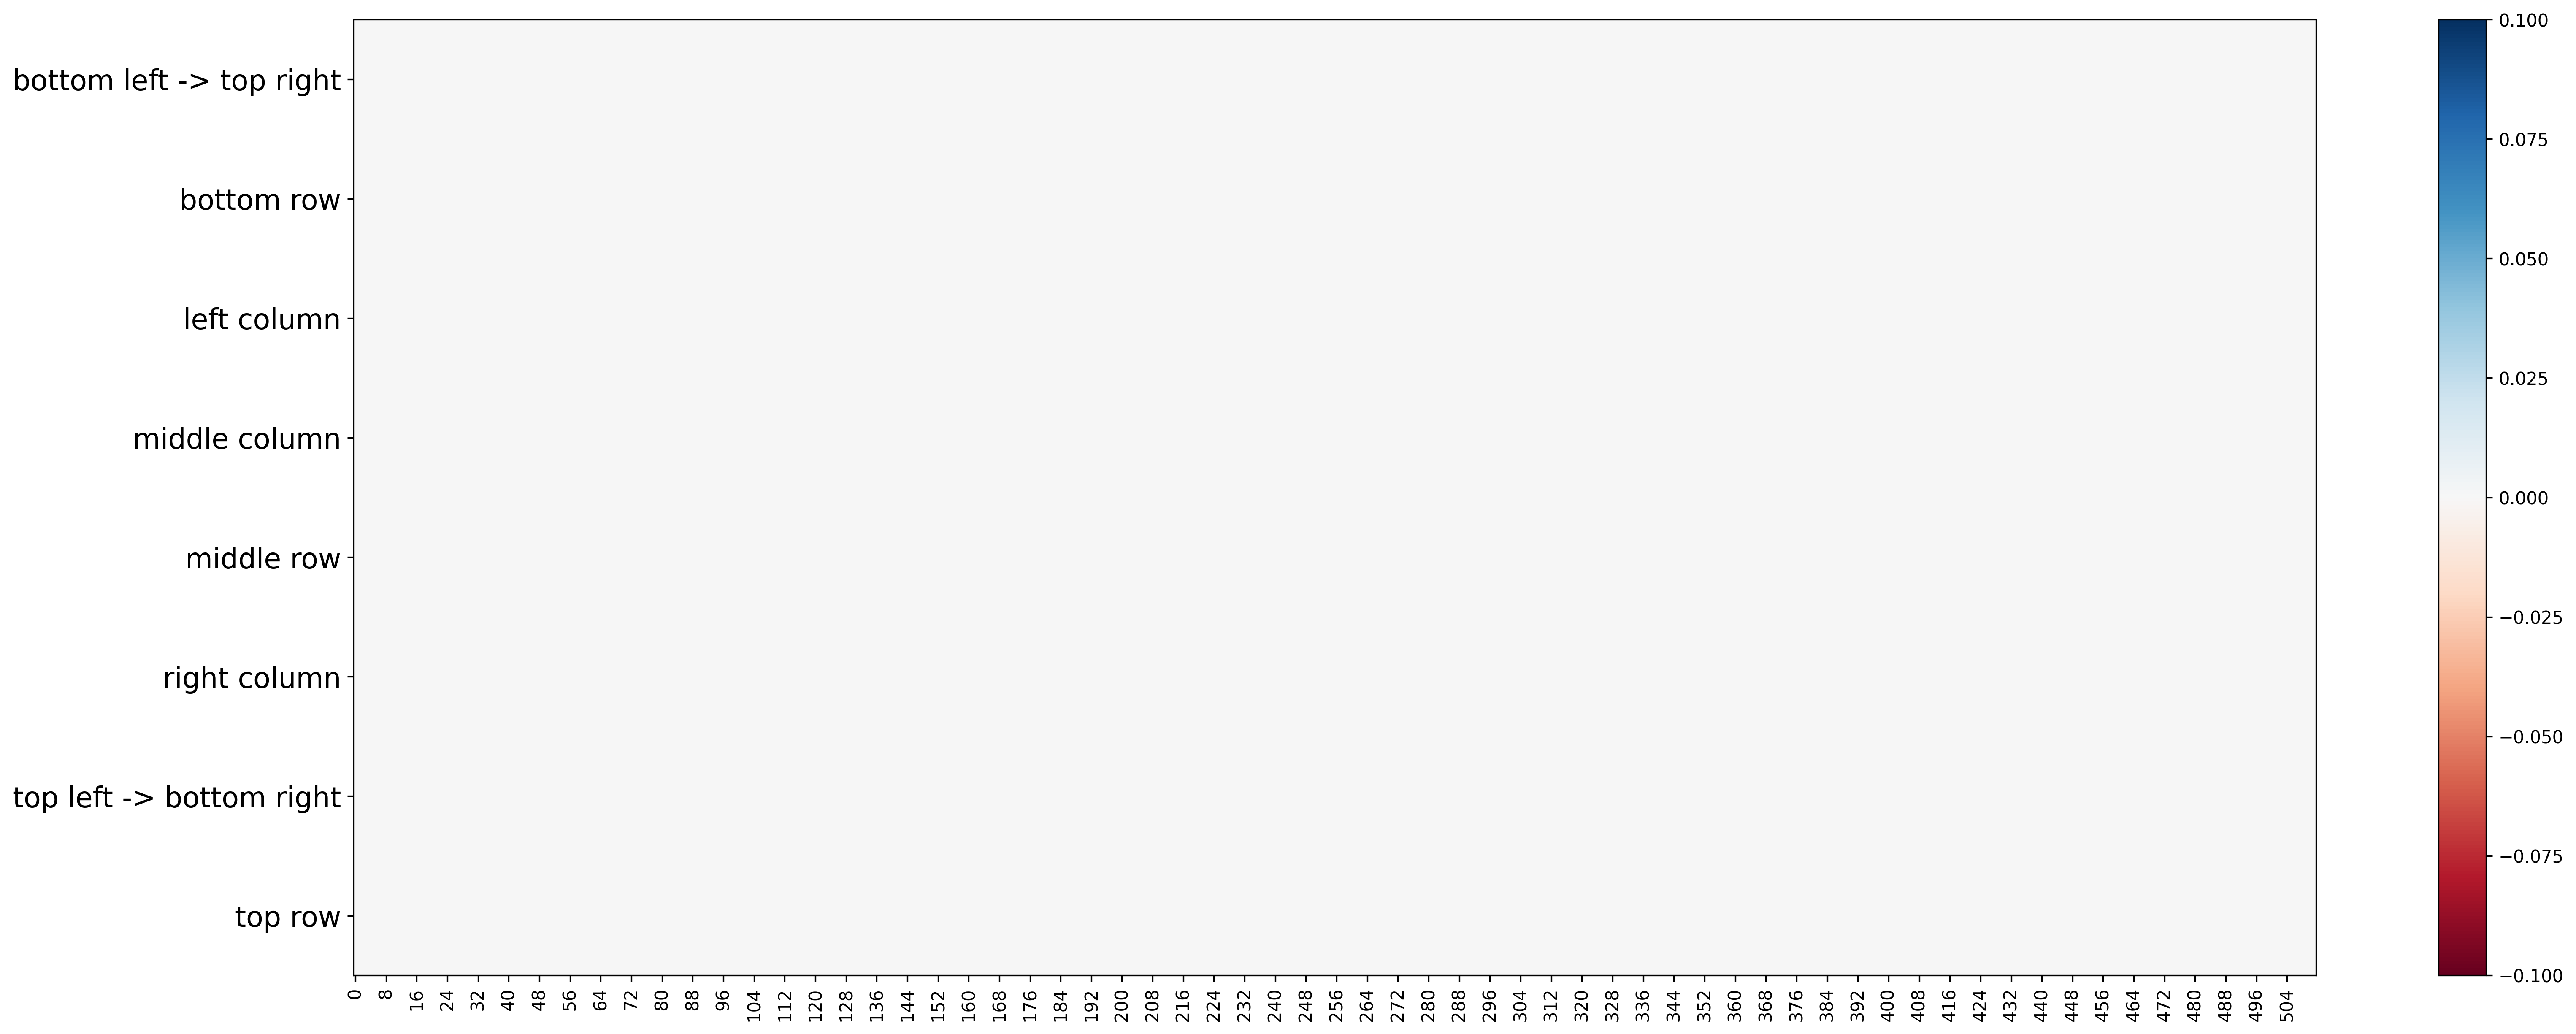

In [7]:
#figure size
plt.rcParams["figure.figsize"] = (25, 10)
plt.rcParams["figure.dpi"] = 300
grouped = normalized_losses_9_moves_played.groupby(["first win condition"])
norm = mcolors.TwoSlopeNorm(vcenter=0)
plt.imshow(grouped.mean(), cmap='RdBu', norm=norm, interpolation="nearest",aspect='auto')
plt.colorbar()
# legend
plt.xticks(np.arange(0, 512, 8), labels=grouped.mean().columns[::8]);
# yticks
plt.yticks(np.arange(0, 8), labels=grouped.mean().index);
#y tick size
plt.tick_params(axis='y', which='major', labelsize=16)
#tilt x ticks
plt.xticks(rotation=90);

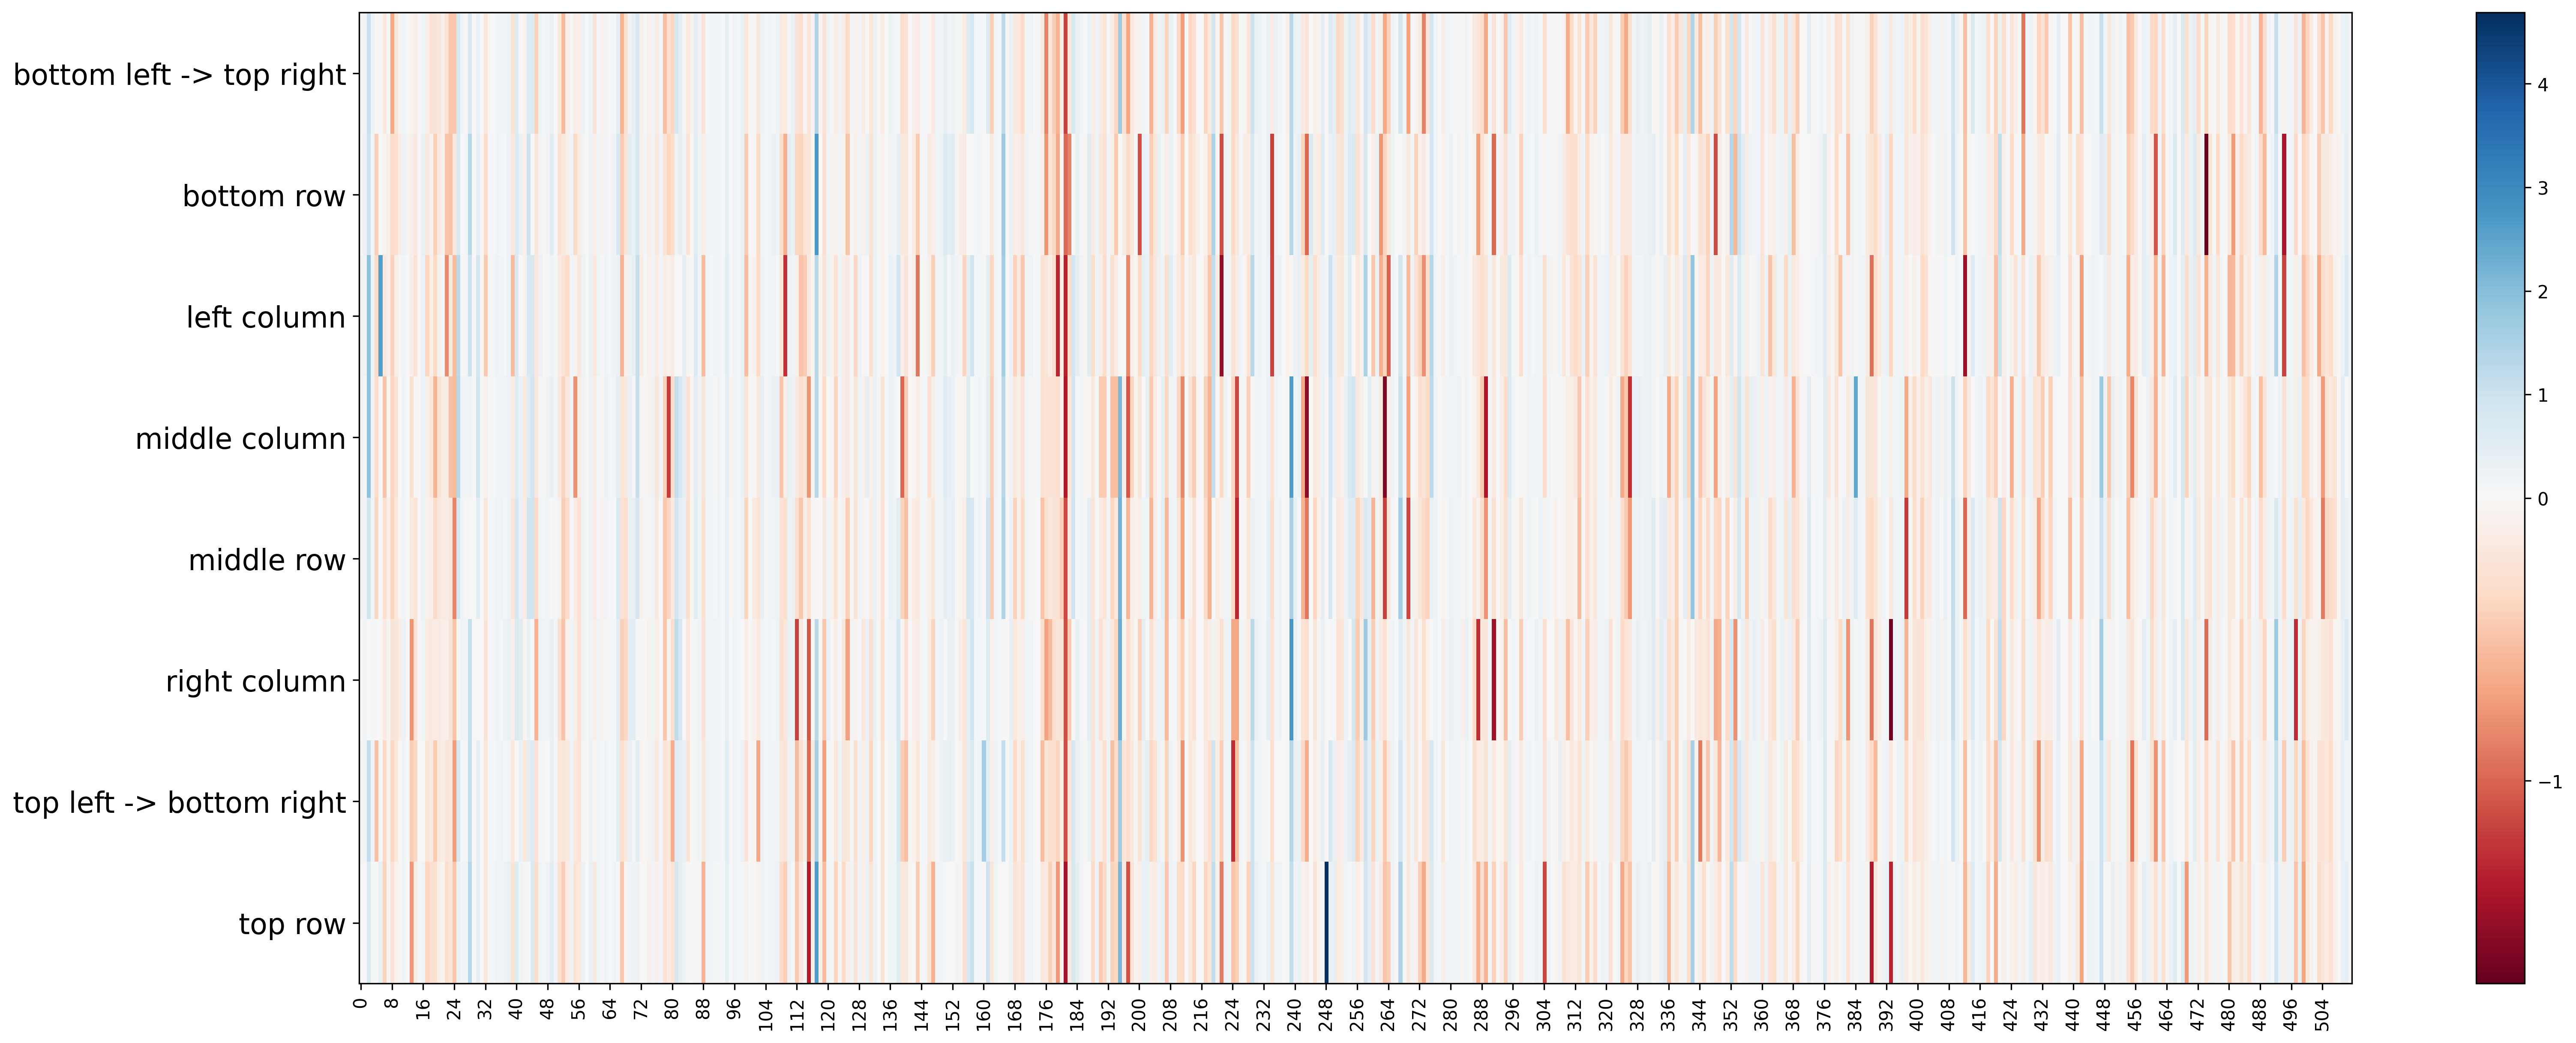

In [9]:

#figure size
plt.rcParams["figure.figsize"] = (25, 10)
plt.rcParams["figure.dpi"] = 300
grouped = normalized_losses_8_moves_played.groupby(["first win condition"])
norm = mcolors.TwoSlopeNorm(vcenter=0)
plt.imshow(grouped.mean(), cmap='RdBu', norm=norm, interpolation="nearest",aspect='auto')
plt.colorbar()
# legend
plt.xticks(np.arange(0, 512, 8), labels=grouped.mean().columns[::8]);
# yticks
plt.yticks(np.arange(0, 8), labels=grouped.mean().index);
#y tick size
plt.tick_params(axis='y', which='major', labelsize=16)
#tilt x ticks
plt.xticks(rotation=90);